In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
violation = pd.read_csv('traffic.csv')

In [3]:
violation.head(2)

Violation Charged Code      Violation Description  Unnamed: 2  \
0                   306B  UNINSPECTED MOTOR VEHICLE        2016   
1                  1180B         SPEED OVER 55 ZONE        2016   

   Violation Month Violation Day of Week  Age at Violation Gender  \
0                3               TUESDAY              21.0      M   
1                3              SATURDAY              18.0      F   

  State of License              Police Agency             Court Source  
0         NEW YORK  1000 ISLAND ST PRK POLICE  ADAMS TOWN COURT  TSLED  
1         NEW YORK  1000 ISLAND ST PRK POLICE  ADAMS TOWN COURT  TSLED

In [4]:
count_row = violation.shape[0]
count_row

14410000

In [5]:
violation.columns

Index(['Violation Charged Code', 'Violation Description', 'Unnamed: 2',
       'Violation Month', 'Violation Day of Week', 'Age at Violation',
       'Gender', 'State of License', 'Police Agency', 'Court', 'Source'],
      dtype='object')

In [6]:
violation.columns = ['ViolationChargedCode','ViolationDescription','Year',
       'ViolationMonth', 'ViolationDayOfWeek', 'AgeAtViolation',
       'Gender', 'StateOfLicense', 'PoliceAgency', 'Court', 'Source']

In [7]:
violationNoNA = violation.dropna()

In [8]:
violationNoNA.head(5)

ViolationChargedCode       ViolationDescription  Year  ViolationMonth  \
0                 306B  UNINSPECTED MOTOR VEHICLE  2016               3   
1                1180B         SPEED OVER 55 ZONE  2016               3   
2                1180B         SPEED OVER 55 ZONE  2016               2   
3                1180D              SPEED IN ZONE  2016               2   
4                1180B         SPEED OVER 55 ZONE  2016               1   

  ViolationDayOfWeek  AgeAtViolation Gender StateOfLicense  \
0            TUESDAY            21.0      M       NEW YORK   
1           SATURDAY            18.0      F       NEW YORK   
2          WEDNESDAY            55.0      M       NEW YORK   
3             SUNDAY            41.0      M       NEW YORK   
4           THURSDAY            25.0      M       NEW YORK   

                PoliceAgency             Court Source  
0  1000 ISLAND ST PRK POLICE  ADAMS TOWN COURT  TSLED  
1  1000 ISLAND ST PRK POLICE  ADAMS TOWN COURT  TSLED  
2  1000 ISLAND ST PRK POLICE  ADAMS TOWN COURT  TSLED  
3  1000 ISLAND ST PRK POLICE  ADAMS TOWN COURT  TSLED  
4  1000 ISLAND ST PRK POLICE  ADAMS TOWN COURT  TSLED

In [9]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


In [10]:
violationNoNA.drop(columns=['ViolationChargedCode', 'StateOfLicense', 'PoliceAgency', 'Court', 'Source' ])

ViolationDescription  Year  ViolationMonth  \
0                 UNINSPECTED MOTOR VEHICLE  2016               3   
1                        SPEED OVER 55 ZONE  2016               3   
2                        SPEED OVER 55 ZONE  2016               2   
3                             SPEED IN ZONE  2016               2   
4                        SPEED OVER 55 ZONE  2016               1   
...                                     ...   ...             ...   
14409995  NO MIRROR/NO LEFTSIDE VIEW MIRROR  2014              12   
14409996          UNINSPECTED MOTOR VEHICLE  2014              12   
14409997          UNINSPECTED MOTOR VEHICLE  2014              12   
14409998            SPEEDING IN SCHOOL ZONE  2014              12   
14409999     AGGRAVATED UNLIC OPER 3RD MISD  2014              12   

         ViolationDayOfWeek  AgeAtViolation Gender  
0                   TUESDAY            21.0      M  
1                  SATURDAY            18.0      F  
2                 WEDNESDAY            55.0      M  
3                    SUNDAY            41.0      M  
4                  THURSDAY            25.0      M  
...                     ...             ...    ...  
14409995             MONDAY            22.0      M  
14409996             MONDAY            43.0      M  
14409997             MONDAY            27.0      F  
14409998             MONDAY            35.0      M  
14409999             MONDAY            43.0      M  

[14377562 rows x 6 columns]

In [11]:
violationNoNA['ViolationDescription'].value_counts().head(10)


SPEED IN ZONE                          2270084
UNINSPECTED MOTOR VEHICLE              1414037
AGGRAVATED UNLIC OPER 3RD MISD          772431
DISOBEYED TRAFFIC DEVICE                759645
UNREGISTERED MOTOR VEHICLE              605262
OPERATING REGISTRATION SUSP/REVOKED     596066
FLD TO STOP AT STOP SIGN                577361
UNLICENSED OPERATOR                     562431
NO SEAT BELT ADULT                      464240
OPERATING MV MOBILE PHONE               458450
Name: ViolationDescription, dtype: int64

In [12]:
violationtop8 = violationNoNA[(violationNoNA['ViolationDescription'] == 'SPEED IN ZONE') | (violationNoNA['ViolationDescription'] == 'UNINSPECTED MOTOR VEHICLE') | (violationNoNA['ViolationDescription'] == 'AGGRAVATED UNLIC OPER 3RD MISD') | (violationNoNA['ViolationDescription'] == 'DISOBEYED TRAFFIC DEVICE')| (violationNoNA['ViolationDescription'] == 'UNREGISTERED MOTOR VEHICLE')| (violationNoNA['ViolationDescription'] == 'OPERATING REGISTRATION SUSP/REVOKED')| (violationNoNA['ViolationDescription'] == 'FLD TO STOP AT STOP SIGN')| (violationNoNA['ViolationDescription'] == 'UNLICENSED OPERATOR')]

In [13]:
violationtop8.head(2)

ViolationChargedCode       ViolationDescription  Year  ViolationMonth  \
0                 306B  UNINSPECTED MOTOR VEHICLE  2016               3   
3                1180D              SPEED IN ZONE  2016               2   

  ViolationDayOfWeek  AgeAtViolation Gender StateOfLicense  \
0            TUESDAY            21.0      M       NEW YORK   
3             SUNDAY            41.0      M       NEW YORK   

                PoliceAgency             Court Source  
0  1000 ISLAND ST PRK POLICE  ADAMS TOWN COURT  TSLED  
3  1000 ISLAND ST PRK POLICE  ADAMS TOWN COURT  TSLED

In [14]:
violationtop8['ViolationDescription'].value_counts()

SPEED IN ZONE                          2270084
UNINSPECTED MOTOR VEHICLE              1414037
AGGRAVATED UNLIC OPER 3RD MISD          772431
DISOBEYED TRAFFIC DEVICE                759645
UNREGISTERED MOTOR VEHICLE              605262
OPERATING REGISTRATION SUSP/REVOKED     596066
FLD TO STOP AT STOP SIGN                577361
UNLICENSED OPERATOR                     562431
Name: ViolationDescription, dtype: int64

In [15]:
violationtop8 = violationtop8.sort_values('ViolationDescription')

In [16]:
len(violationtop8['ViolationDescription'].unique())

8

In [17]:
bydesc = violationtop8.groupby('ViolationDescription')

In [ ]:
#violationfiltered.groupby('Year').count()

In [16]:
violationtop8.head(3)

ViolationChargedCode            ViolationDescription  Year  \
14409999                5111A  AGGRAVATED UNLIC OPER 3RD MISD  2014   
7681530                 5111A  AGGRAVATED UNLIC OPER 3RD MISD  2017   
7681529                 5111A  AGGRAVATED UNLIC OPER 3RD MISD  2017   

          ViolationMonth ViolationDayOfWeek  AgeAtViolation Gender  \
14409999              12             MONDAY            43.0      M   
7681530               11          WEDNESDAY            21.0      M   
7681529               11          WEDNESDAY            42.0      M   

         StateOfLicense                PoliceAgency                 Court  \
14409999       NEW YORK  BETHLEHEM TOWN POLICE DEPT  BETHLEHEM TOWN COURT   
7681530        NEW YORK  BETHLEHEM TOWN POLICE DEPT  BETHLEHEM TOWN COURT   
7681529        NEW YORK  BETHLEHEM TOWN POLICE DEPT  BETHLEHEM TOWN COURT   

         Source  
14409999  TSLED  
7681530   TSLED  
7681529   TSLED

In [13]:
violationtop8.to_csv('top8.csv', index=False)

#MATPLOTLIB

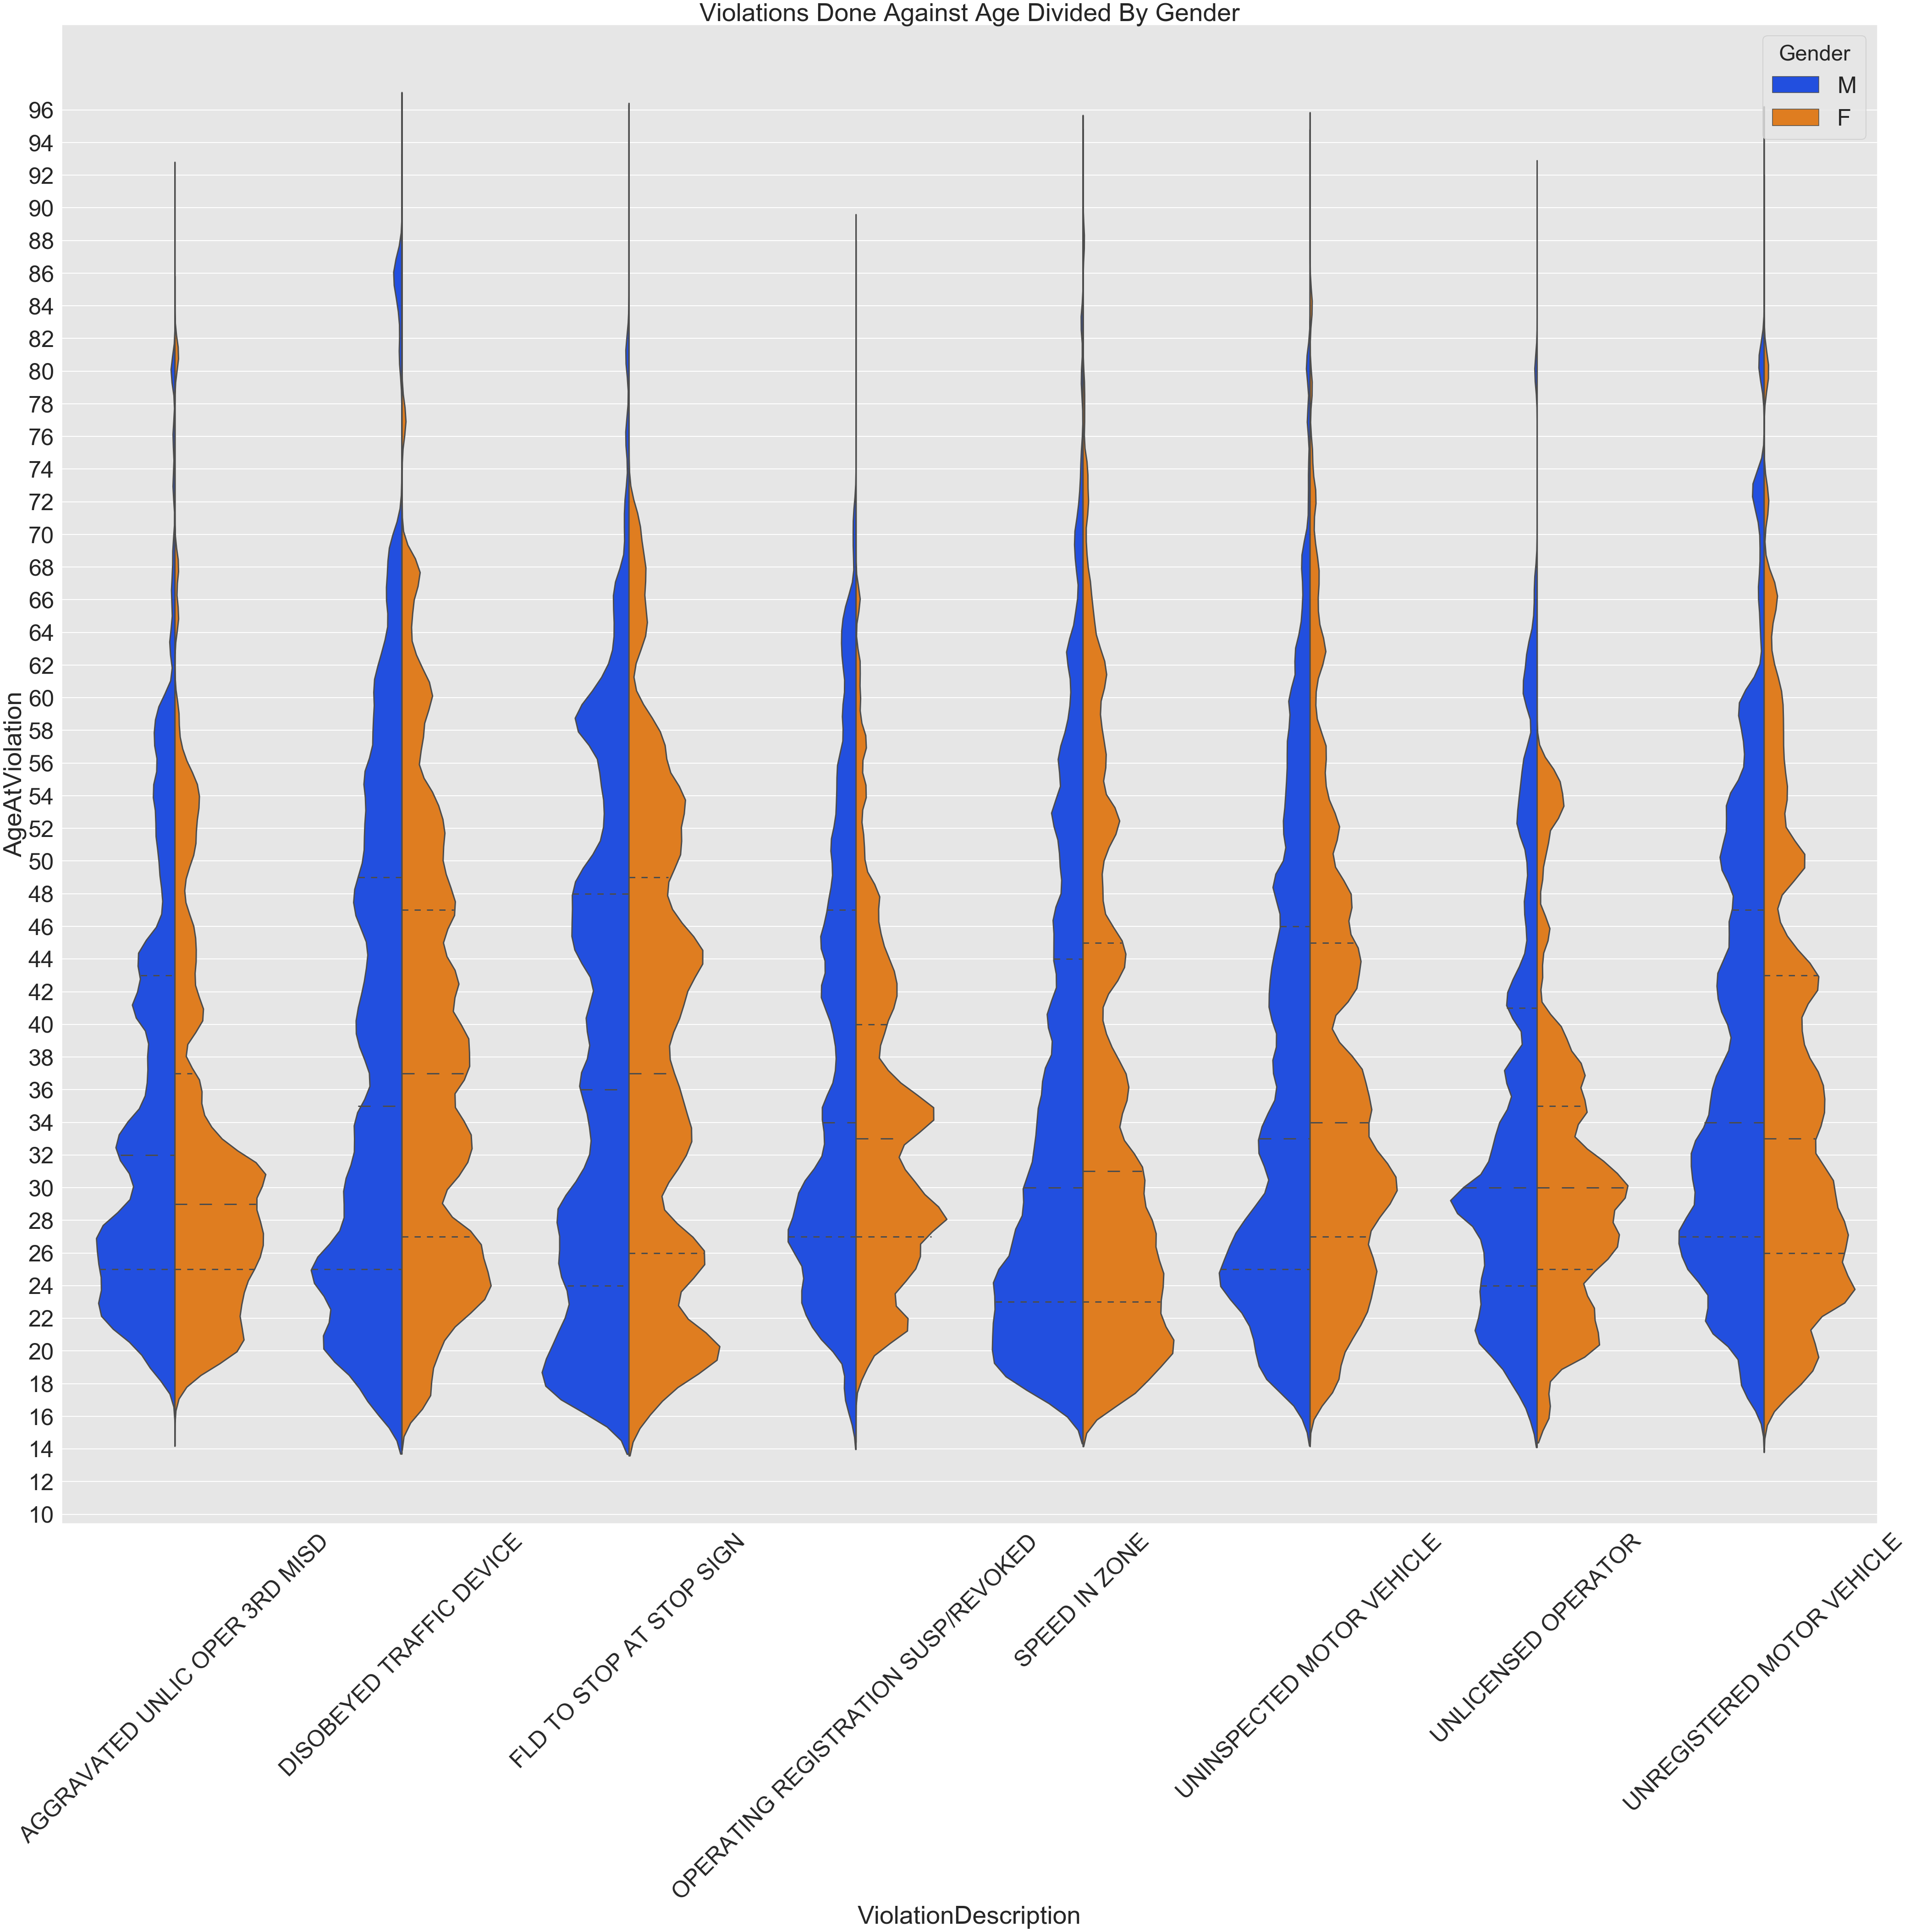

In [20]:
plt.figure(figsize=(60,60))
sns.set_context('poster',font_scale=2.3)
sns.set_style('darkgrid', {"axes.facecolor": ".9"})
sns.despine(top=False,right=False)
plt.xlabel('Violation')
plt.ylabel('Age')
plt.title('Violations Done Against Age Divided By Gender')


plt.yticks([ 8,10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64,66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92,94, 96])
viz1 = sns.violinplot(x='ViolationDescription',y='AgeAtViolation',hue='Gender',split=True,data=violationtop8,aspect=1,size=20,inner="quartile",palette="bright")
viz1.set_xticklabels(viz1.get_xticklabels(),rotation=45,fontweight='light')
plt.tight_layout()
plt.savefig("Vizualization1png.pdf")

Done With 1

In [32]:
bydesc['Gender'].value_counts()

ViolationDescription                 Gender
AGGRAVATED UNLIC OPER 3RD MISD       M          506167
                                     F          266264
DISOBEYED TRAFFIC DEVICE             M          438391
                                     F          321254
FLD TO STOP AT STOP SIGN             M          364970
                                     F          212391
OPERATING REGISTRATION SUSP/REVOKED  M          348549
                                     F          247517
SPEED IN ZONE                        M         1348383
                                     F          921701
UNINSPECTED MOTOR VEHICLE            M          876249
                                     F          537788
UNLICENSED OPERATOR                  M          356161
                                     F          206270
UNREGISTERED MOTOR VEHICLE           M          375821
                                     F          229441
Name: Gender, dtype: int64

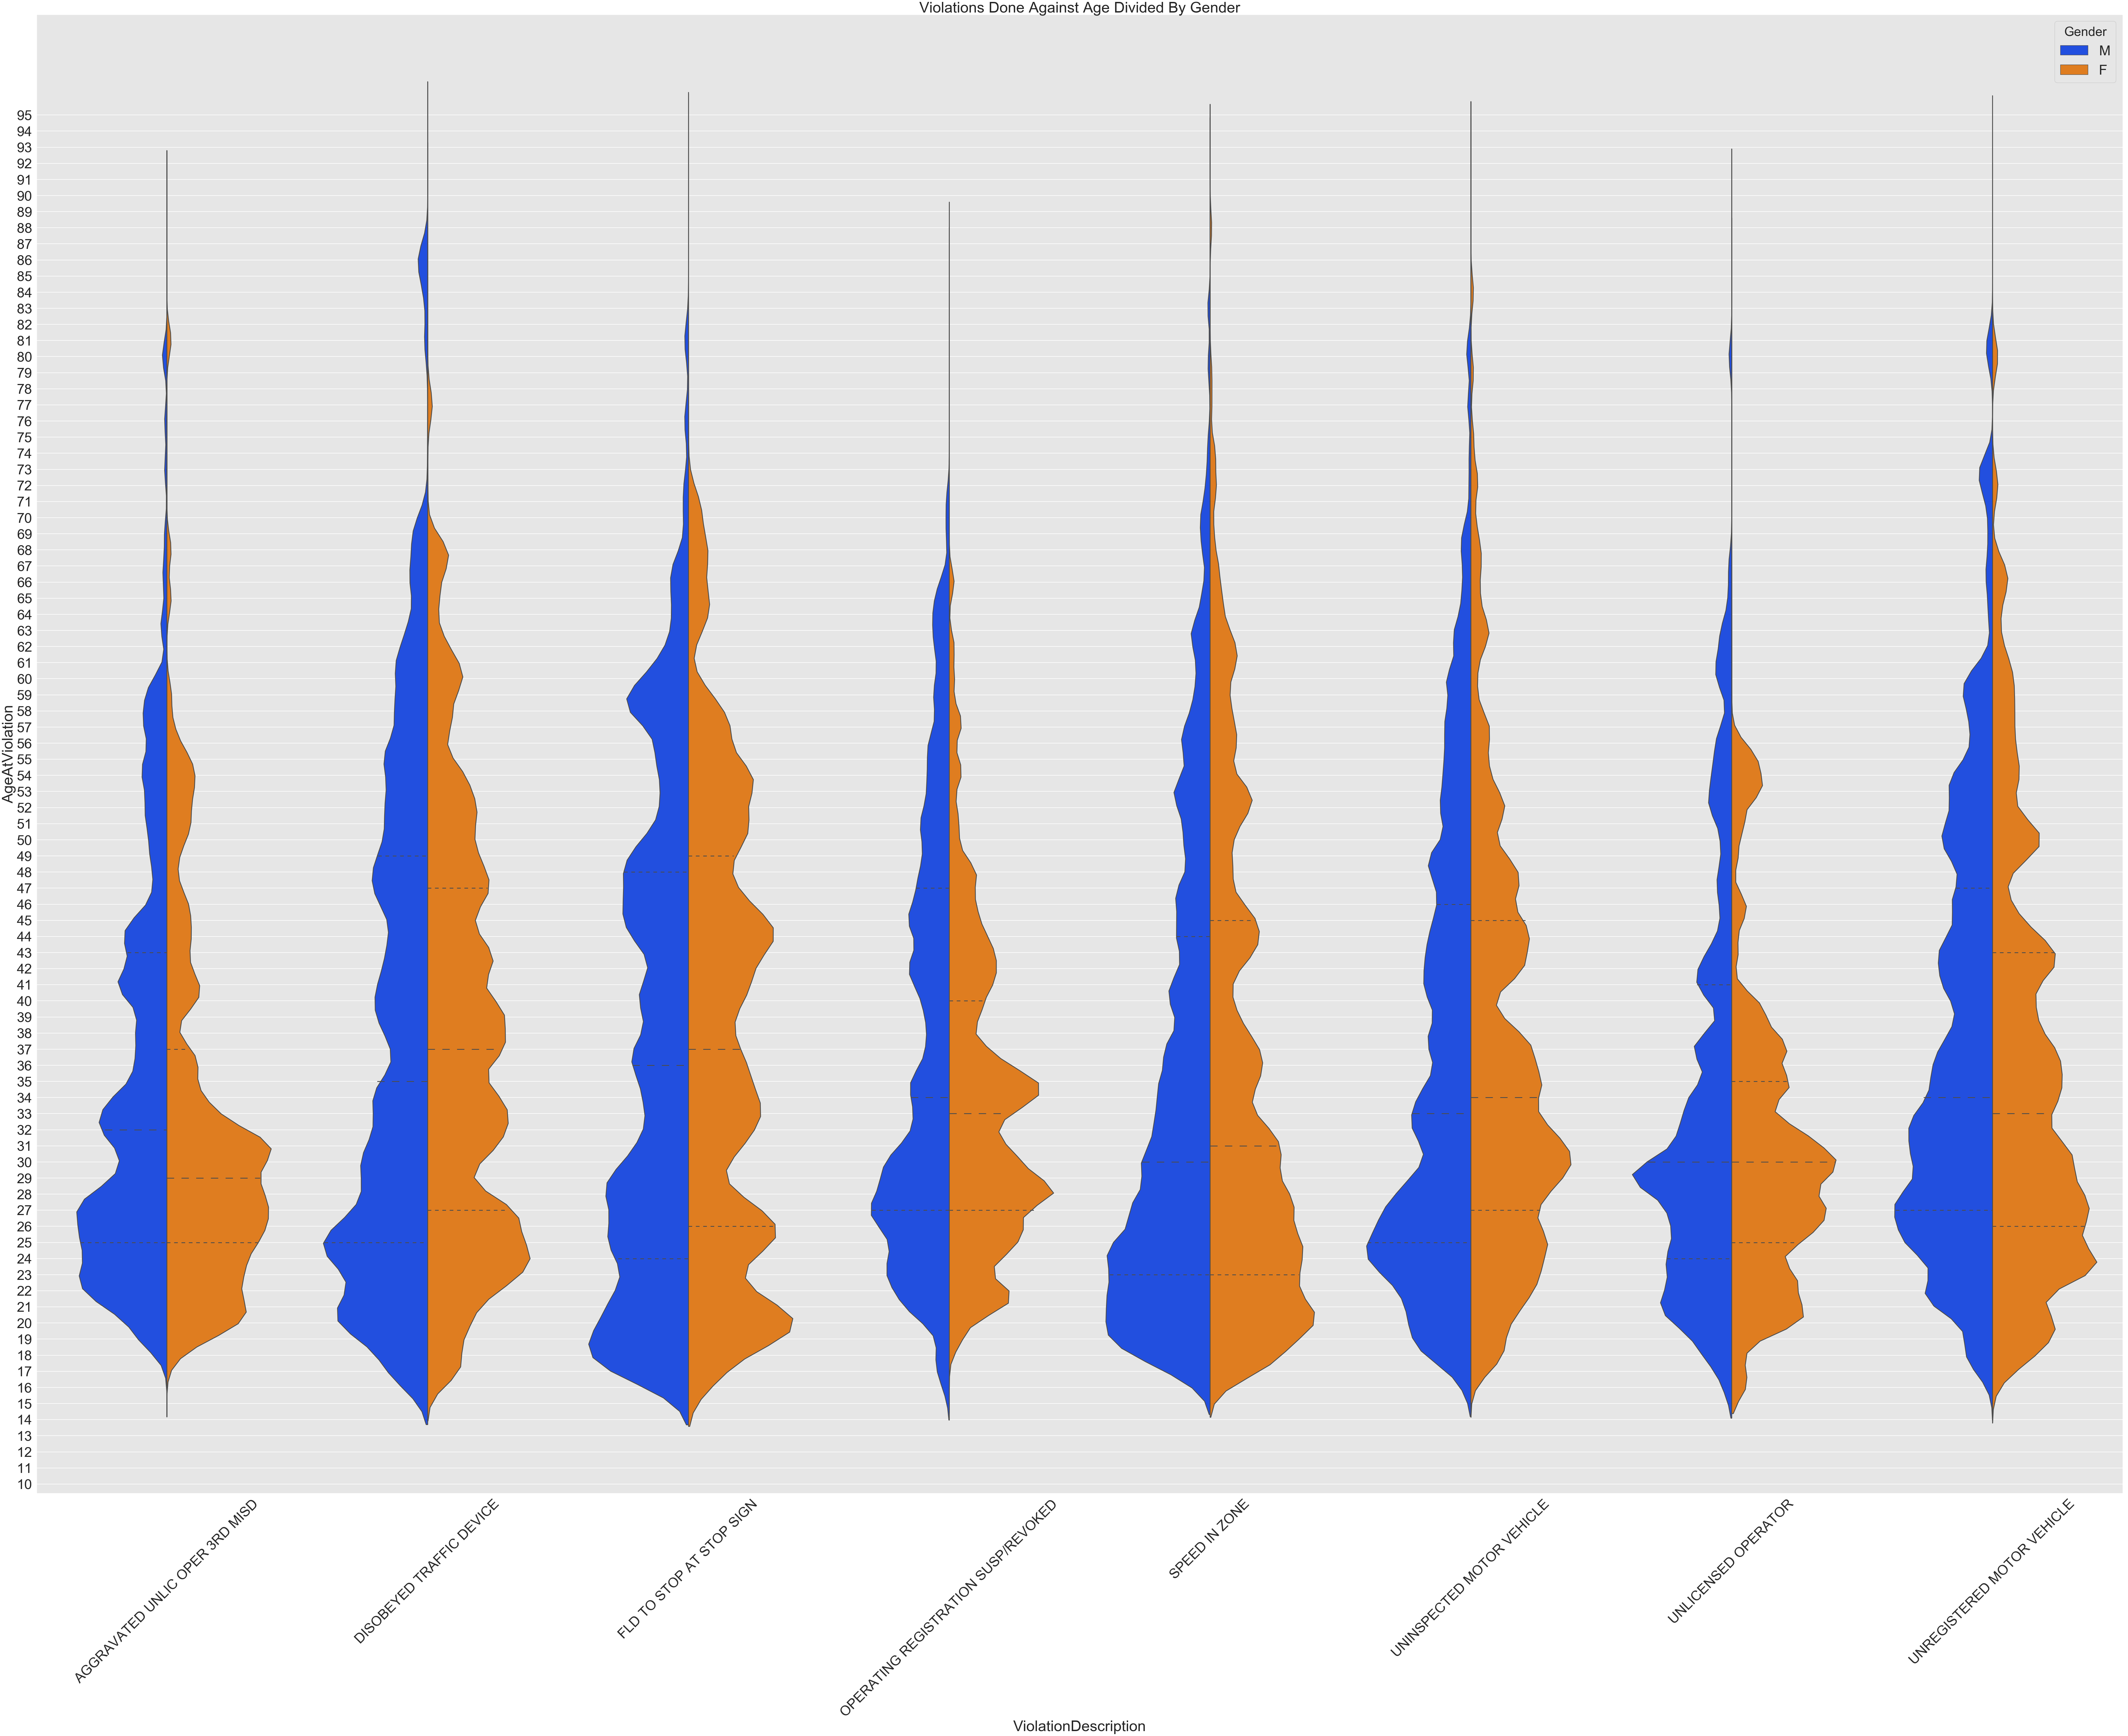

In [37]:
plt.figure(figsize=(110,90))
sns.set_context('poster',font_scale=2.3)
sns.set_style('darkgrid', {"axes.facecolor": ".9"})
sns.despine(top=False,right=False)
plt.xlabel('Violation')
plt.ylabel('Age')
plt.title('Violations Done Against Age Divided By Gender')


plt.yticks([9,10,11,12,13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95])
viz1 = sns.violinplot(x='ViolationDescription',y='AgeAtViolation',hue='Gender',split=True,data=violationtop8,aspect=1,size=20,inner="quartile",palette="bright")
viz1.set_xticklabels(viz1.get_xticklabels(),rotation=45,fontweight='light')
plt.tight_layout()


In [16]:
from plotly import __version__
print(__version__)
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

4.3.0


In [17]:
violationtop30 = violationNoNA[(violationNoNA['ViolationDescription'] == 'SPEED IN ZONE') | (violationNoNA['ViolationDescription'] == 'UNINSPECTED MOTOR VEHICLE') | (violationNoNA['ViolationDescription'] == 'AGGRAVATED UNLIC OPER 3RD MISD') | (violationNoNA['ViolationDescription'] == 'DISOBEYED TRAFFIC DEVICE')| (violationNoNA['ViolationDescription'] == 'UNREGISTERED MOTOR VEHICLE')| (violationNoNA['ViolationDescription'] == 'OPERATING REGISTRATION SUSP/REVOKED')| (violationNoNA['ViolationDescription'] == 'FLD TO STOP AT STOP SIGN')| (violationNoNA['ViolationDescription'] == 'UNLICENSED OPERATOR')| (violationNoNA['ViolationDescription'] == 'NO SEAT BELT ADULT')| (violationNoNA['ViolationDescription'] == 'OPERATING MV MOBILE PHONE')| (violationNoNA['ViolationDescription'] == 'NO/INADEQUATE HEADLAMPS')| (violationNoNA['ViolationDescription'] == 'FLD DUE CARE FOR EMERG VEH STOPPED OR STANDING')| (violationNoNA['ViolationDescription'] == 'OPER MV WHILE USING PORTABLE ELEC DEV')| (violationNoNA['ViolationDescription'] == 'OPERATING W/O INSURANCE')| (violationNoNA['ViolationDescription'] == 'FOLLOWING TOO CLOSELY')| (violationNoNA['ViolationDescription'] == 'PASSED RED SIGNAL')| (violationNoNA['ViolationDescription'] == 'INADEQUATE OR NO STOP LAMPS')| (violationNoNA['ViolationDescription'] == 'FAILED TO KEEP RIGHT')| (violationNoNA['ViolationDescription'] == 'SPEEDING IN SCHOOL ZONE')| (violationNoNA['ViolationDescription'] == 'DRIVING WHILE INTOXICATED')| (violationNoNA['ViolationDescription'] == 'NO/INSUFFICIENT TAIL LAMPS')| (violationNoNA['ViolationDescription'] == 'SPEED OVER 55 ZONE')| (violationNoNA['ViolationDescription'] == 'PLATE MISSING/INSECURE/DIRTY')| (violationNoNA['ViolationDescription'] == 'NO/INADEQUATE PLATE LAMPS')| (violationNoNA['ViolationDescription'] == 'SIDEWINGS/SIDEWINDOWS/NON/TRANSPARENT')| (violationNoNA['ViolationDescription'] == 'MOVED FROM LANE UNSAFELY/WEAVING')| (violationNoNA['ViolationDescription'] == 'DRIVING W/.08 OF 1 PERCENT OF ALCO/BLD')| (violationNoNA['ViolationDescription'] == 'NO/INADEQUATE MUFFLER/EXHAUST SYSTEM')| (violationNoNA['ViolationDescription'] == 'IMPROPER SIGNAL')| (violationNoNA['ViolationDescription'] == 'FAILED TO DIM HEADLAMPS')| (violationNoNA['ViolationDescription'] == 'FLD TO YLD RT-OF-WAY ON LEFT TURN')]

In [18]:
violationtop30['Count'] = 1

In [23]:
violationtop30.head(3)

ViolationChargedCode       ViolationDescription  Year  ViolationMonth  \
0                 306B  UNINSPECTED MOTOR VEHICLE  2016               3   
1                1180B         SPEED OVER 55 ZONE  2016               3   
2                1180B         SPEED OVER 55 ZONE  2016               2   

  ViolationDayOfWeek  AgeAtViolation Gender StateOfLicense  \
0            TUESDAY            21.0      M       NEW YORK   
1           SATURDAY            18.0      F       NEW YORK   
2          WEDNESDAY            55.0      M       NEW YORK   

                PoliceAgency             Court Source  Count  
0  1000 ISLAND ST PRK POLICE  ADAMS TOWN COURT  TSLED      1  
1  1000 ISLAND ST PRK POLICE  ADAMS TOWN COURT  TSLED      1  
2  1000 ISLAND ST PRK POLICE  ADAMS TOWN COURT  TSLED      1

In [24]:
violationtop30['ViolationDescription'].value_counts()

SPEED IN ZONE                                     2270084
UNINSPECTED MOTOR VEHICLE                         1414037
AGGRAVATED UNLIC OPER 3RD MISD                     772431
DISOBEYED TRAFFIC DEVICE                           759645
UNREGISTERED MOTOR VEHICLE                         605262
OPERATING REGISTRATION SUSP/REVOKED                596066
FLD TO STOP AT STOP SIGN                           577361
UNLICENSED OPERATOR                                562431
NO SEAT BELT ADULT                                 464240
OPERATING MV MOBILE PHONE                          458450
NO/INADEQUATE HEADLAMPS                            379354
FLD DUE CARE FOR EMERG VEH STOPPED OR STANDING     242970
OPER MV WHILE USING PORTABLE ELEC DEV              231928
OPERATING W/O INSURANCE                            220471
FOLLOWING TOO CLOSELY                              218512
PASSED RED SIGNAL                                  215520
INADEQUATE OR NO STOP LAMPS                        206237
FAILED TO KEEP

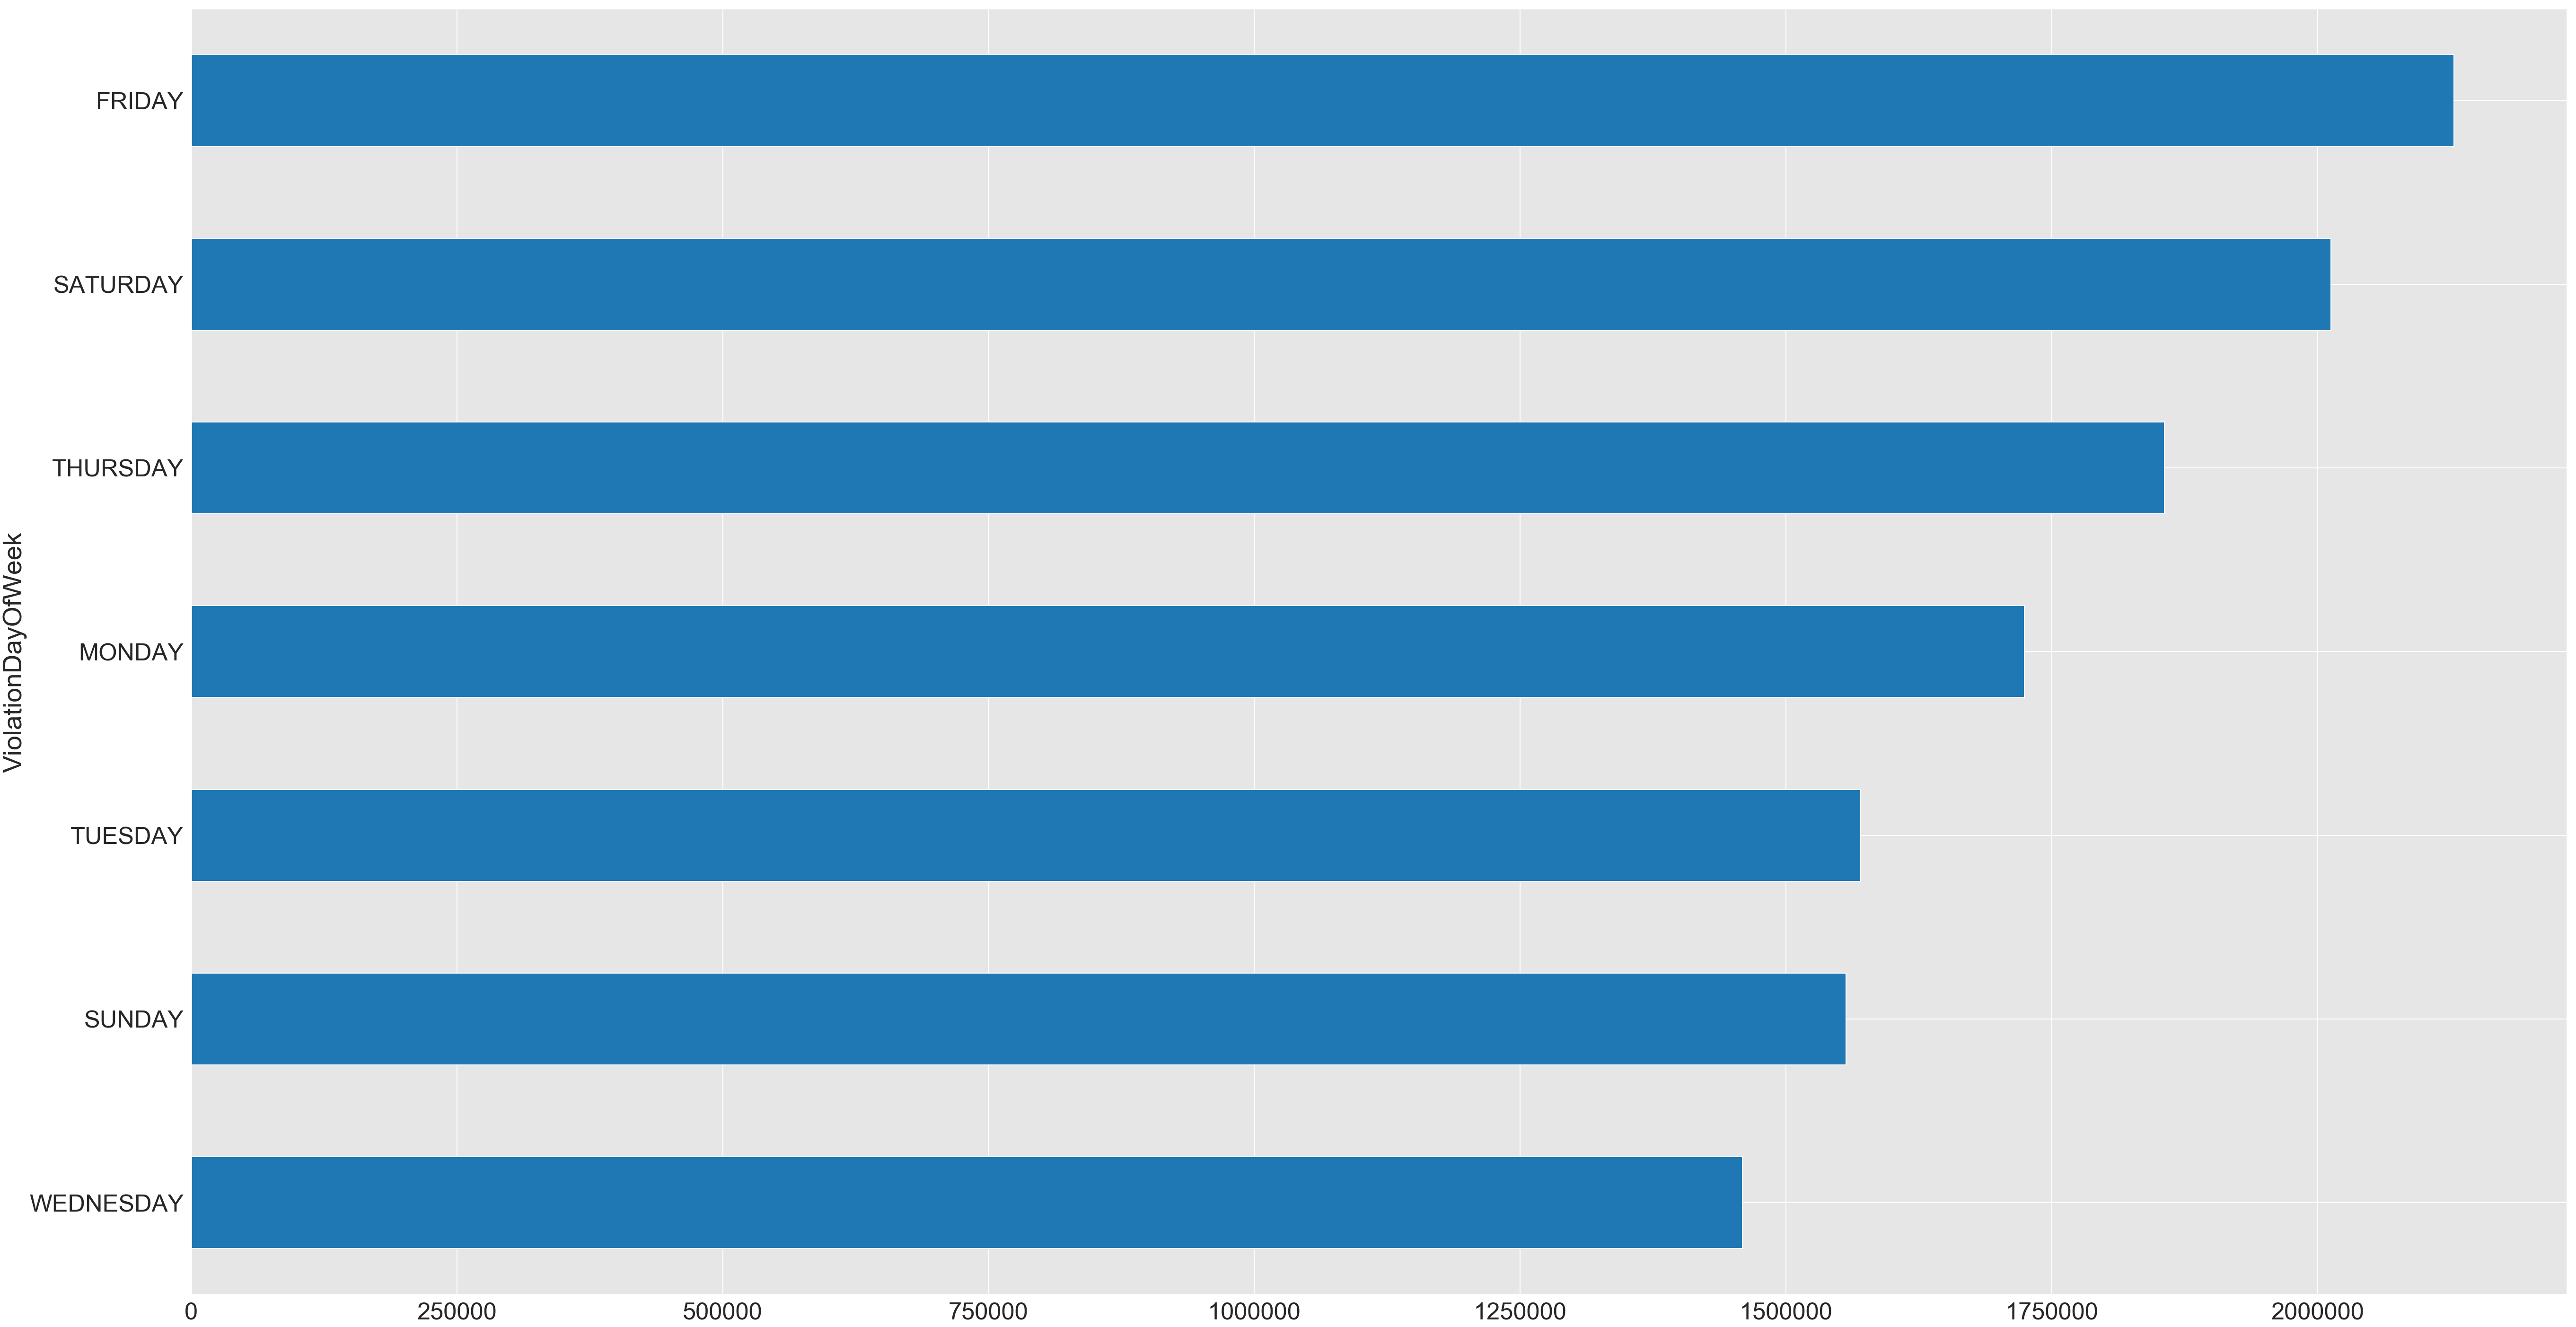

In [27]:
violationtop30.groupby(['ViolationDayOfWeek'])['Count'].count().sort_values().plot.barh(figsize=(90,50))

SyntaxError: invalid syntax (<ipython-input-59-fe583645af78>, line 1)

In [58]:
viz1 = iplot.violinplot(x='ViolationDescription',y='AgeAtViolation',hue='Gender',split=True,data=violationtop8,aspect=1,size=20,inner="quartile",palette="dark")

AttributeError: 'function' object has no attribute 'violinplot'

In [ ]:
Stacked Bar Chart

animals=['giraffes', 'orangutans', 'monkeys']

fig = go.Figure(data=[
    go.Bar(name='SF Zoo', x="ViolationDayOfWeek", y="V"),
    go.Bar(name='LA Zoo', x="ViolationDayOfWeek", y=[12, 18, 29])
])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()
violationtop30.groupby(['ViolationDayOfWeek','Year'])['Count'].count().iplot(kind='stacked')

In [ ]:
fig = df.iplot(asFigure=True, kind='bar', barmode = 'stack',
               xTitle='ViolationDayOfWeek',yTitle='Count',title='Returns')

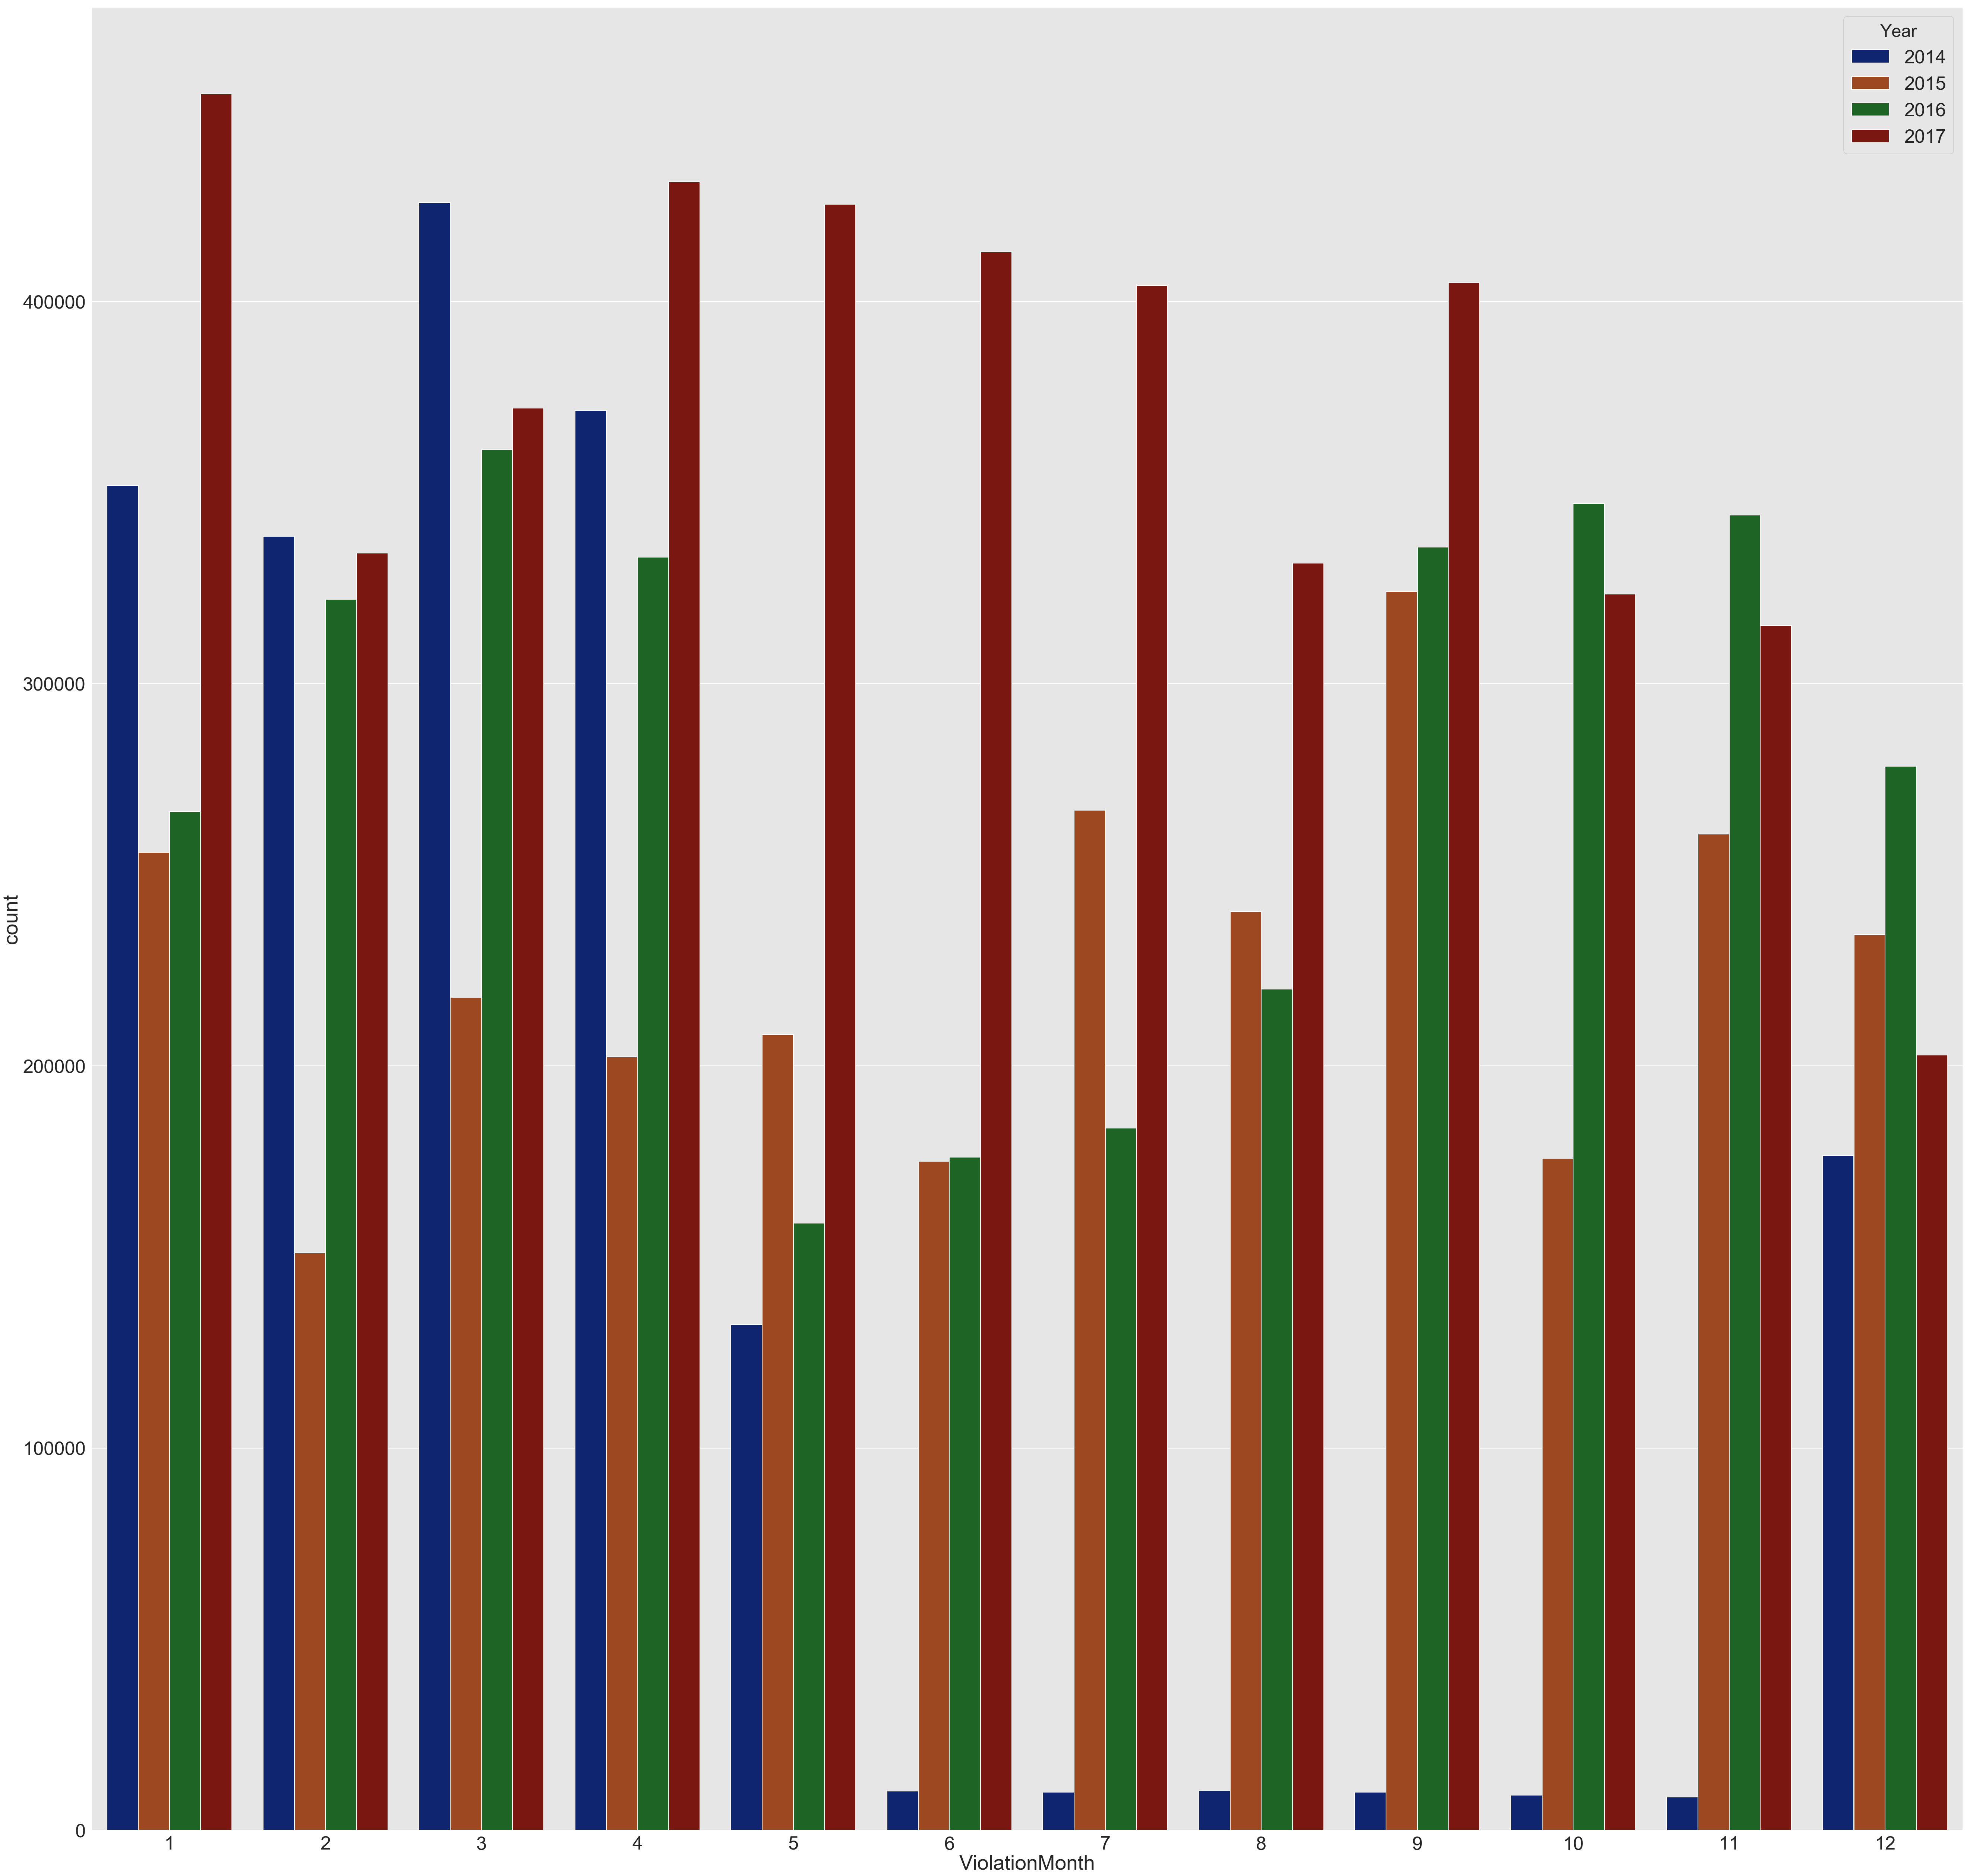

In [66]:

plt.figure(figsize=(90,90))
sns.set_context('poster',font_scale=2.3)
sns.set_style('darkgrid', {"axes.facecolor": ".9"})
sns.despine(top=False,right=False)
sns.countplot(x='ViolationMonth', data=violationtop30,hue='Year',palette="dark")

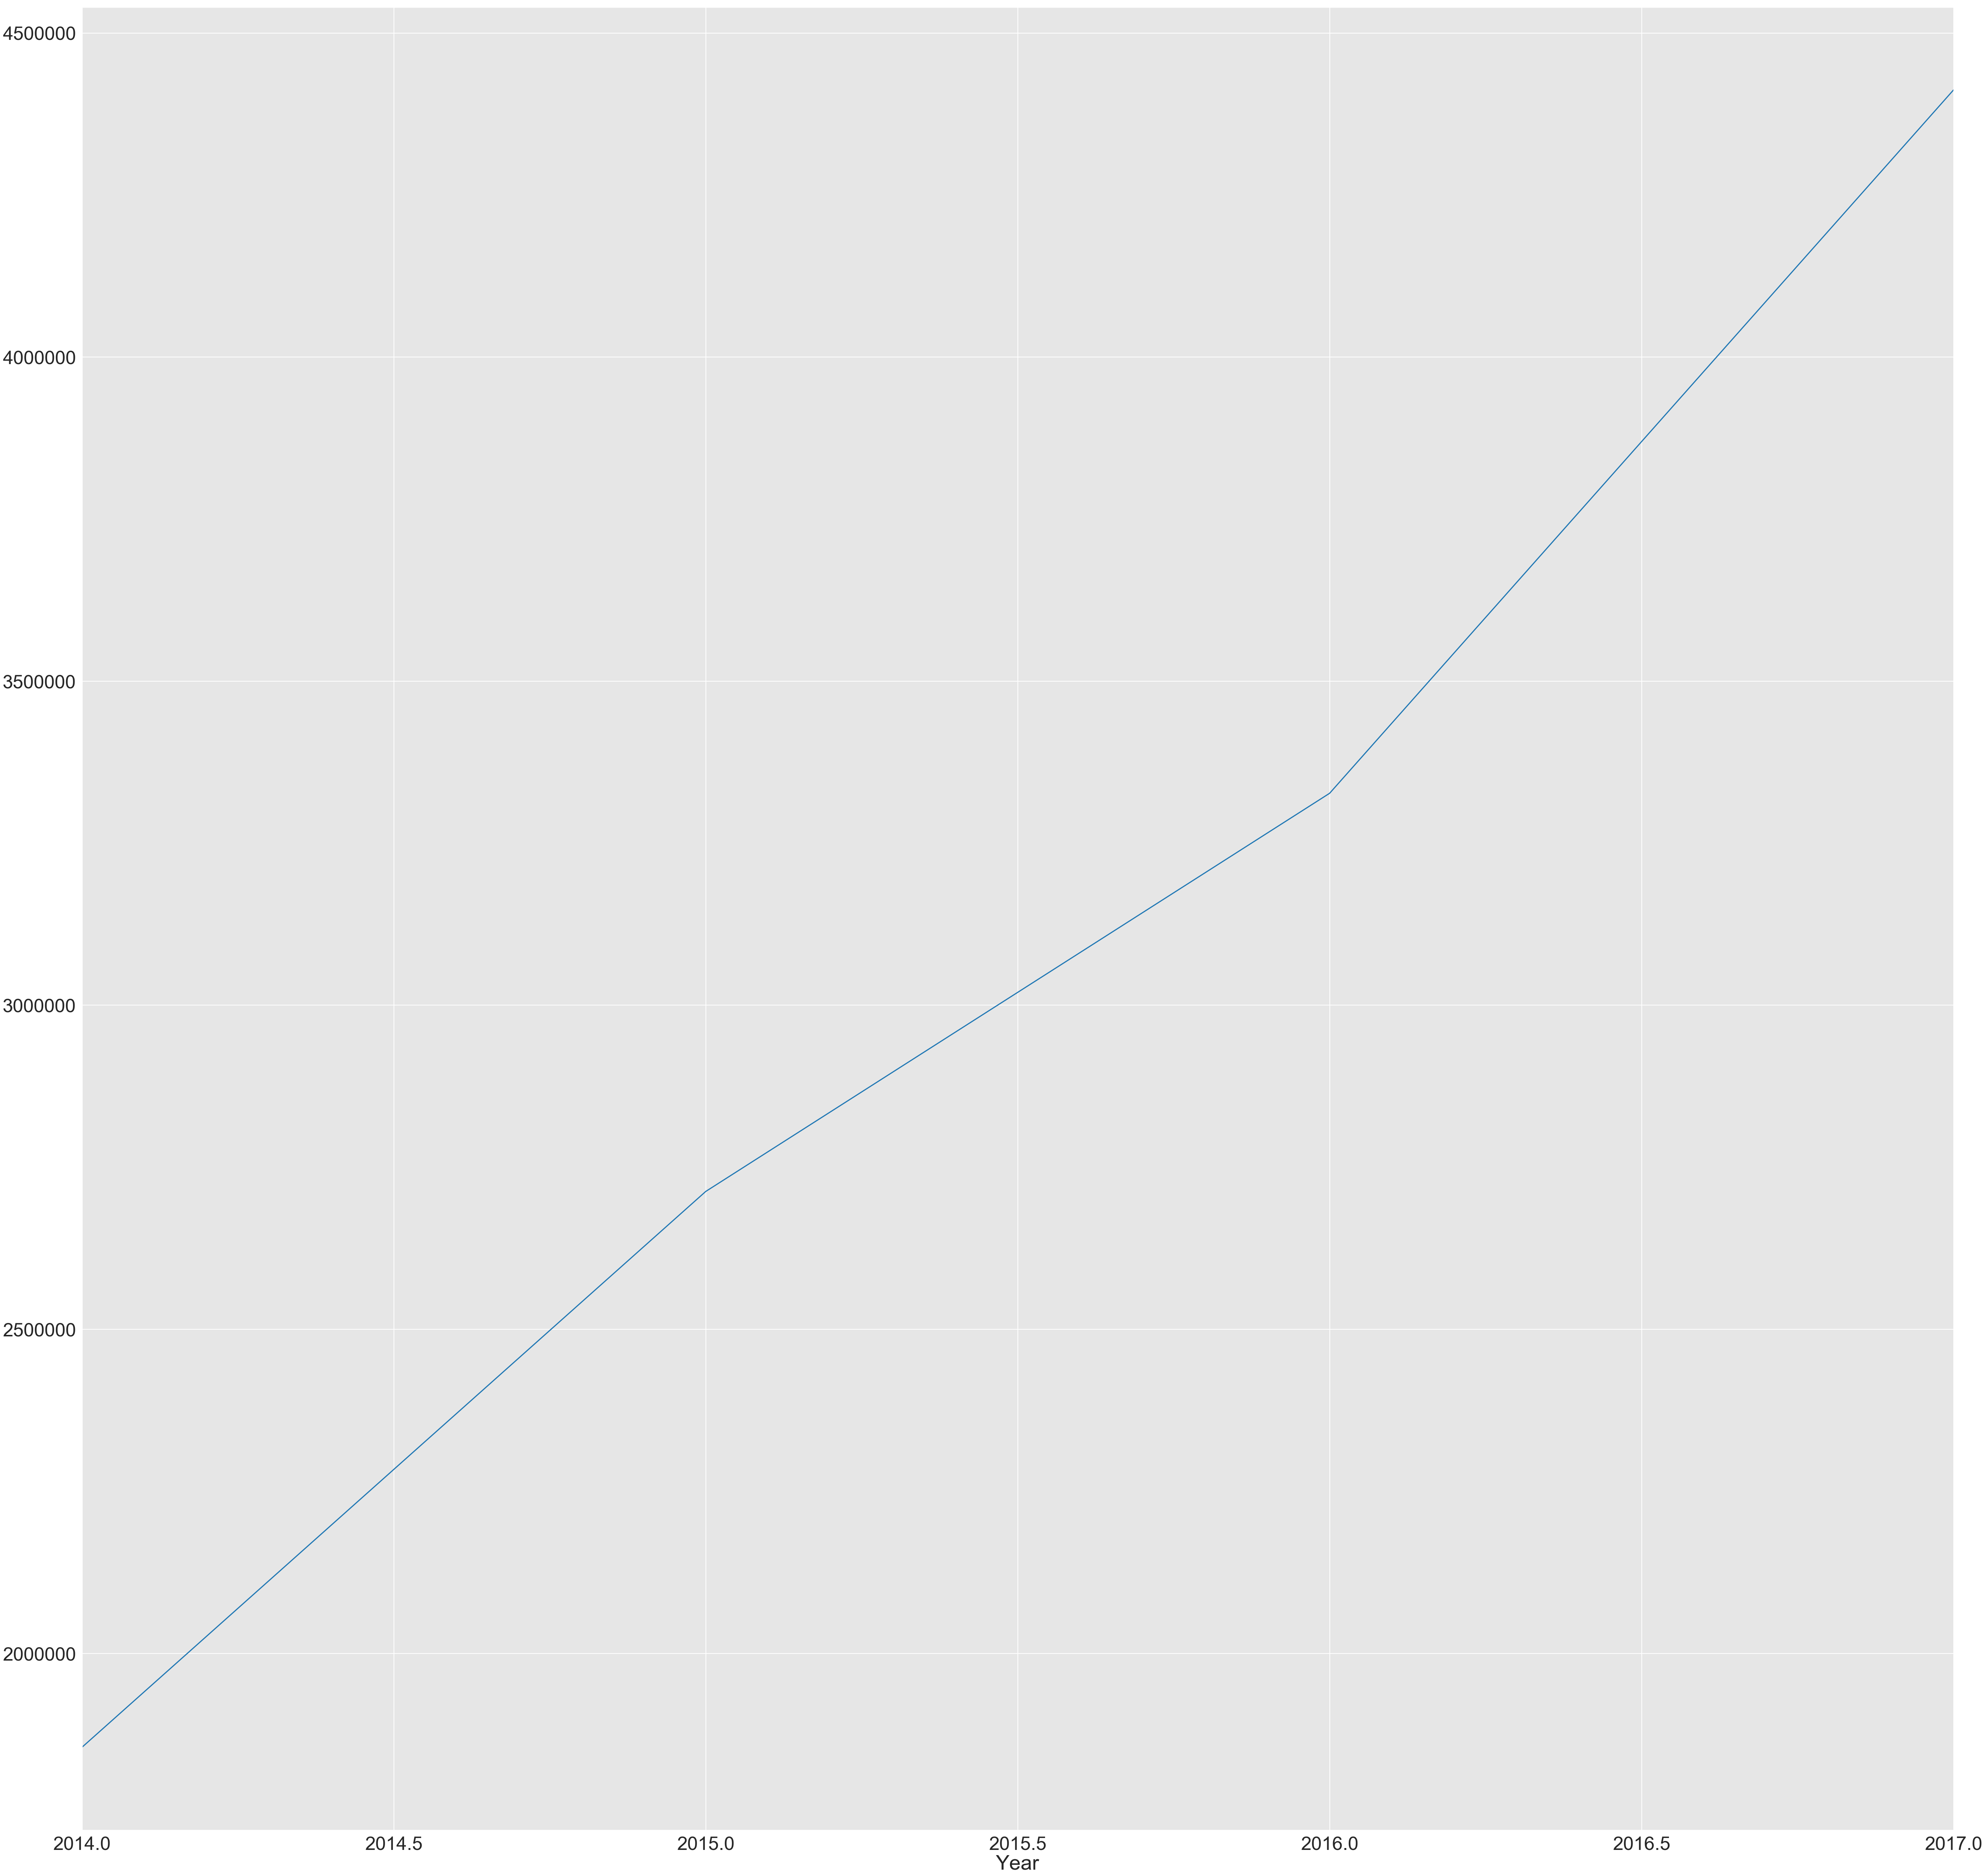

In [76]:
plt.figure(figsize=(90,90))
sns.set_context('poster',font_scale=2.3)
sns.set_style('darkgrid', {"axes.facecolor": ".9"})
sns.despine(top=False,right=False)
violationtop30.groupby('Year').count().sort_values('Count')['Count'].plot()

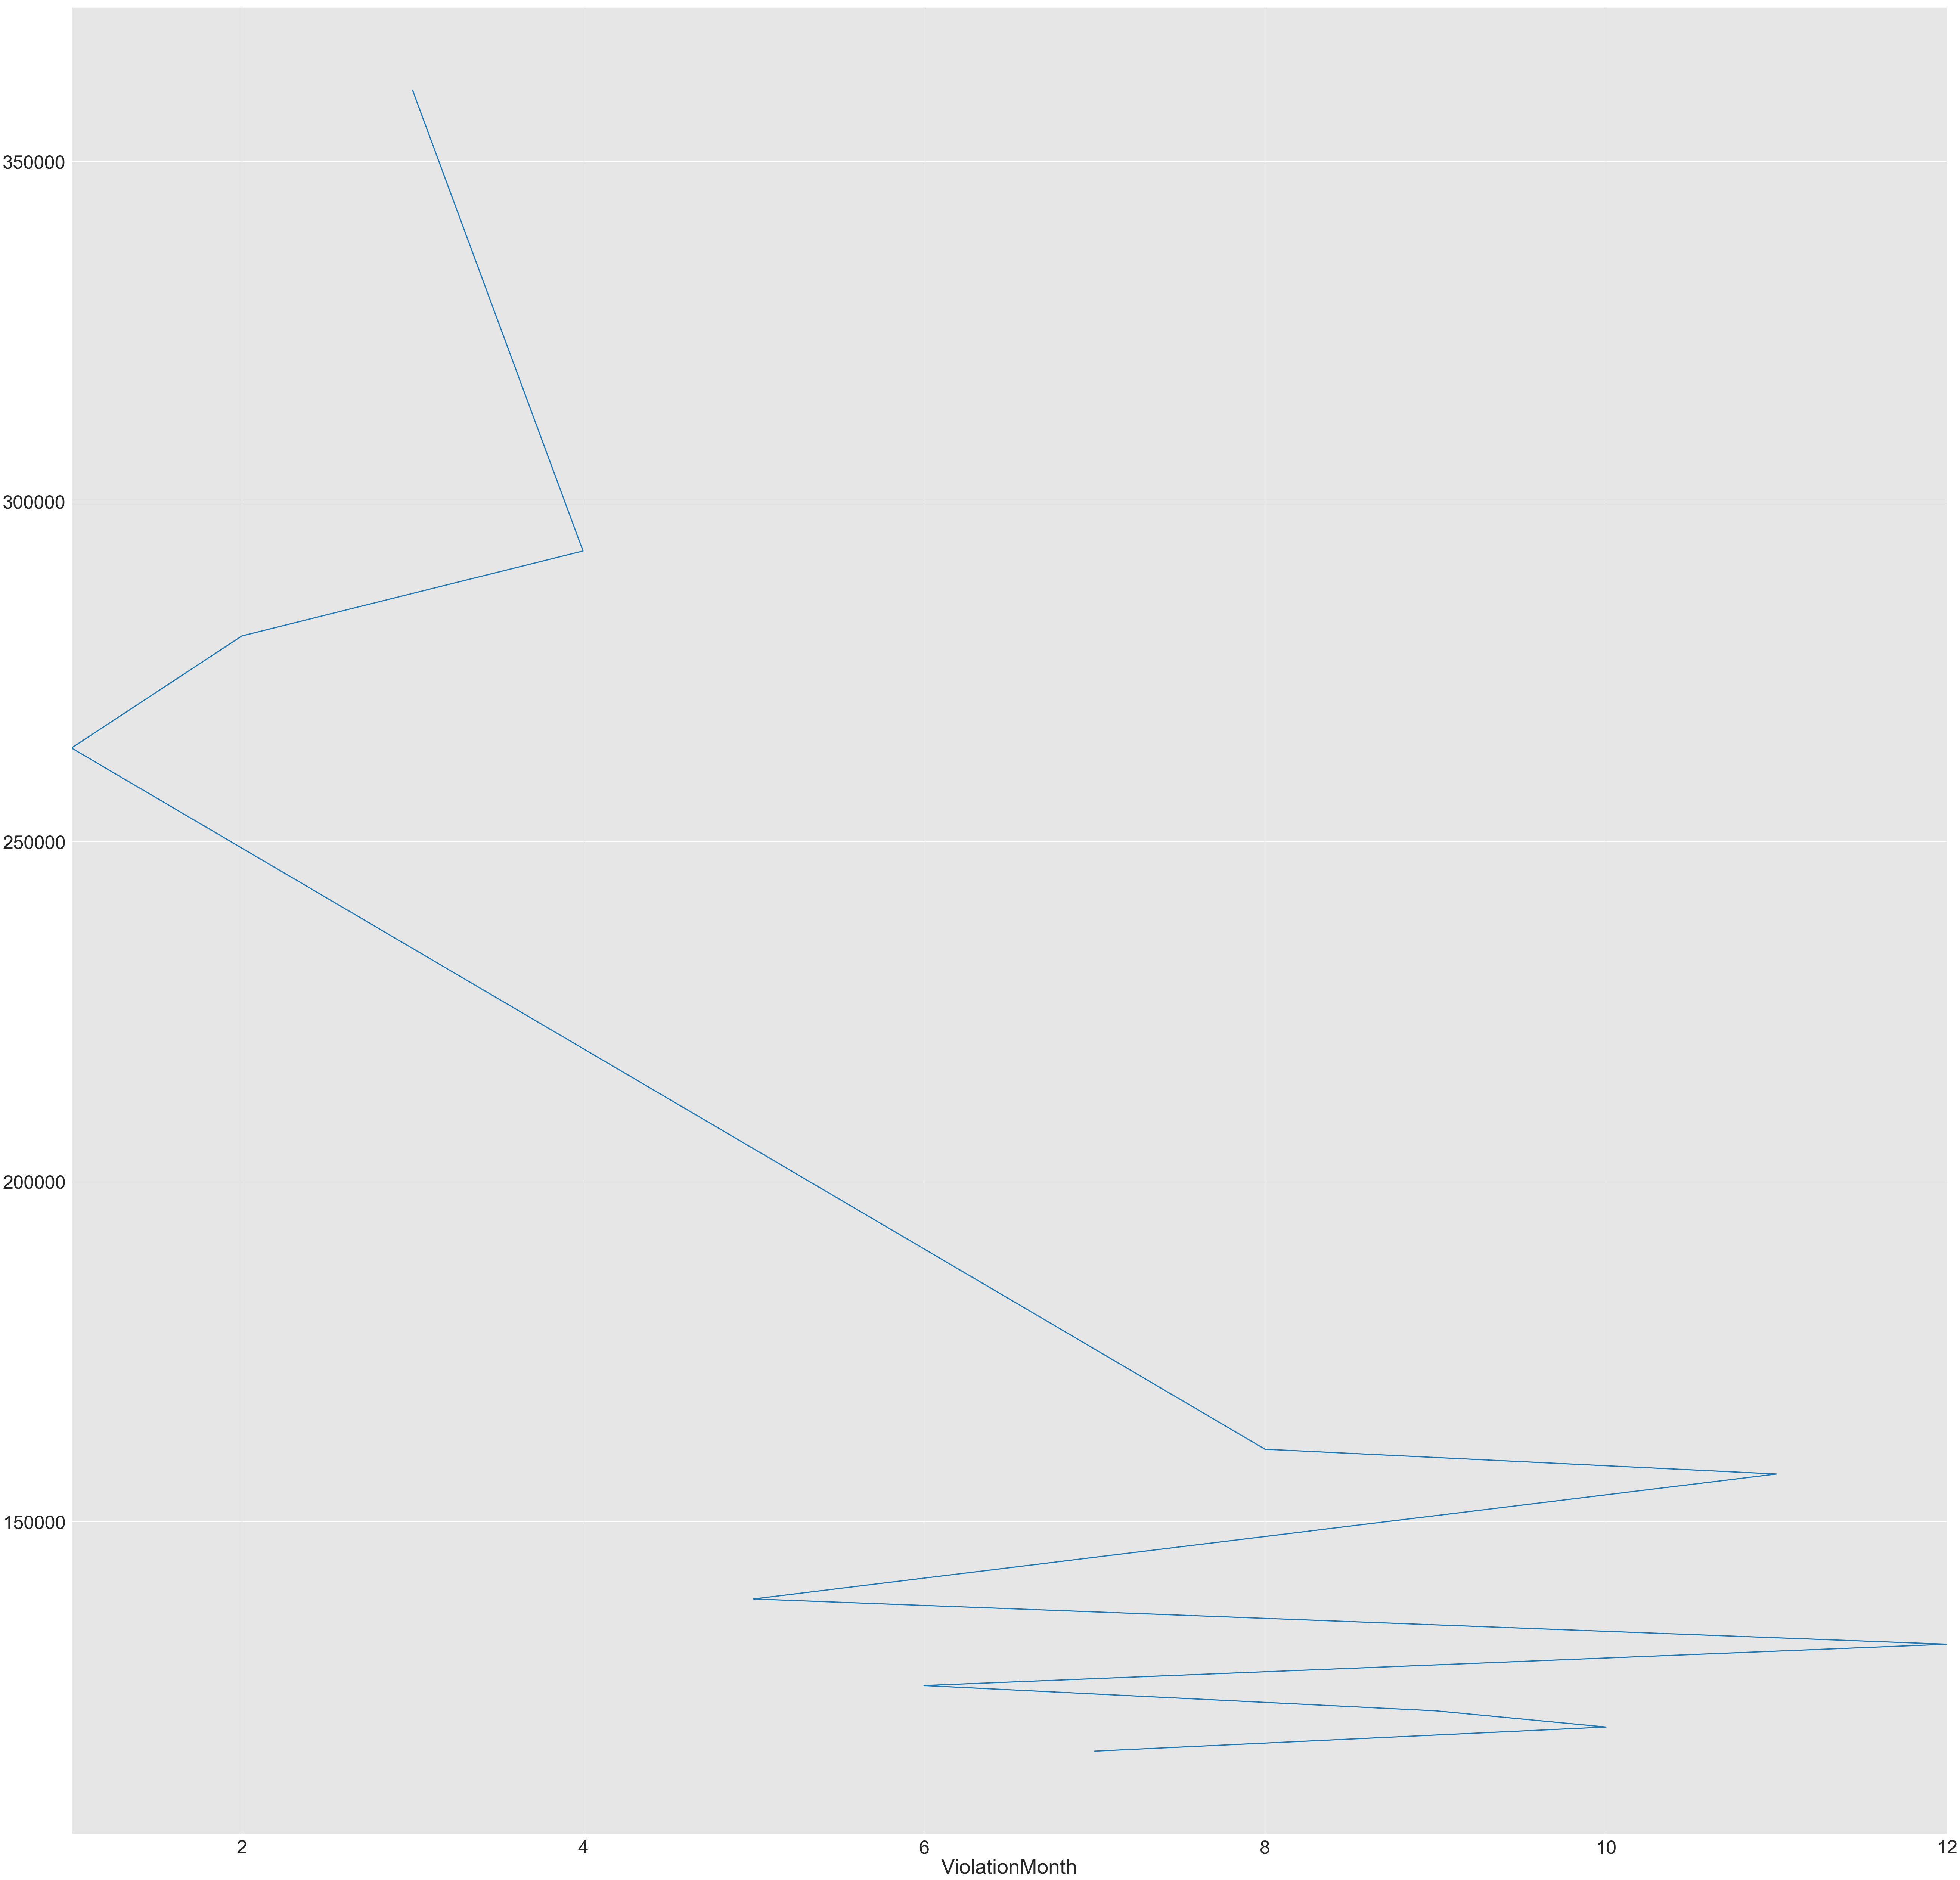

In [79]:
plt.figure(figsize=(90,90))
sns.set_context('poster',font_scale=2.3)
sns.set_style('darkgrid', {"axes.facecolor": ".9"})
sns.despine(top=False,right=False)
violationtop30[violationtop30['ViolationDescription']=='SPEED IN ZONE'].groupby('ViolationMonth').count().sort_values('Count')['Count'].plot()

In [26]:
violationtop30.to_csv('top30.csv', index=False)

In [27]:
violationNoNA.to_csv('AllNoNA.csv', index=False)